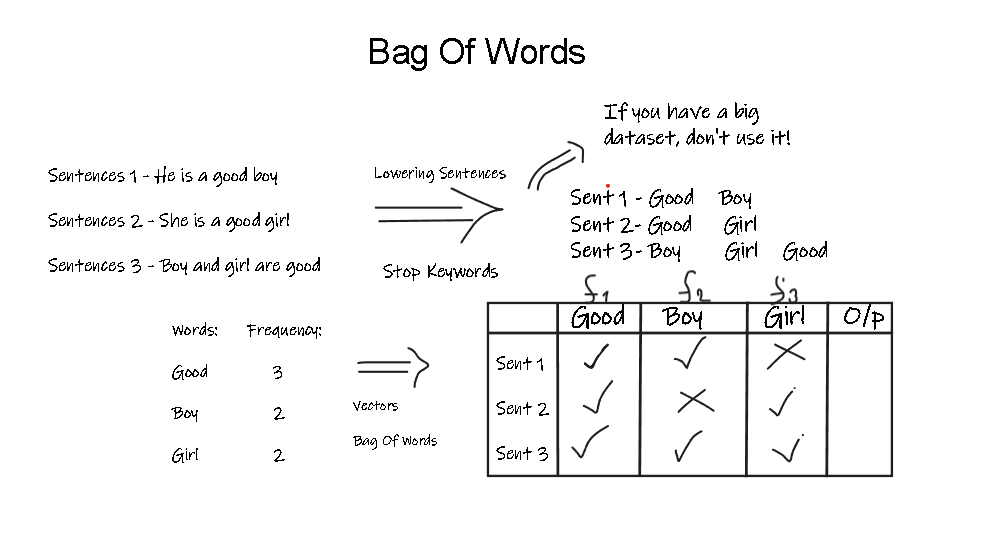

##  Two major weaknesses of the bag-of-words approach by Salton and McGill are demonstrated below with reference to the traditional English folk song Greensleeves.

The text of the lines of the chorus are:

"Greensleeves was all my joy,

Greensleeves was my delight,

Greensleeves was my heart of gold,

And who but my lady Greensleeves."

Giving us a dictionary of thirteen words (frequencies are listed in brackets):

greensleeves (4).

was (3).

all (1).

my (4).

joy (1).

delight (1).

heart (1).

of (1).

gold (1).

and (1).

who (1).

but (1).

lady (1).

The column vectors below represent the word frequencies in each line of the chorus:

[ 1 1 1 1 1 0 0 0 0 0 0 0 0 ] 

[ 1 1 0 1 0 1 0 0 0 0 0 0 0 ] 

[ 1 1 0 1 0 0 1 1 1 0 0 0 0 ] 

[ 1 0 0 1 0 0 0 0 0 1 1 1 1 ] 

But we have lost:

The meaning or semantics of the chorus, or of any other text corpus, i.e. what it is actually saying.

The ordering of the words.
References:


Salton and McGill: G. Salton and M. J. McGill. Introduction to Modern Information Retrieval. McGraw-Hill, New York, NY, USA, 1983.

In [18]:
# Bag Of Words

import nltk

paragraph = """Turkish nation! Your homeland is no longer a despotic state ruled by sultans. It is now a modern and sovereign republic. A republic that you have established with great sacrifice and determination.
The foundations of this republic are democracy and freedom. Its fundamental principles are based on the concept of national sovereignty, where power belongs to the people. Every citizen, regardless of their religion, language, or race, is equal before the law.
Our aim is to raise the standards of civilization of our nation to the level of contemporary civilizations. We must embrace science, knowledge, and reason. We must strive for progress in every field, from education to industry, from agriculture to technology.
Let us remember that the true power of a nation lies in the unity and solidarity of its people. We must cast aside our differences and work together as one. We have proven to the world that we are capable of achieving great things when we are united.
Our national sovereignty is our most precious possession. We will protect it at all costs and defend our independence against any threat. We will not allow any external influence to hinder our progress or undermine our sovereignty.
We must also never forget the sacrifices made by our heroes and martyrs. They fought bravely to secure the future of our nation. It is our duty to honor their memory by continuing to build a strong and prosperous Turkey.
Turkish nation! The Republic of Turkey is in your hands. It is up to you to preserve its principles and ensure its progress. Let us work together, with determination and perseverance, to create a brighter future for our country and our people.
Long live the Republic of Turkey"""

In [19]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [20]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []

In [21]:
# Cleaning the sentences
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i]) #Removing mark question, comma, dot, etc...
    review = review.lower() # Lowercase
    review = review.split() # Splitting
    review = (wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english')))
    review = ' '.join(review)
    corpus.append(review)
    print(corpus)


['turkish nation']
['turkish nation', 'homeland longer despotic state ruled sultan']
['turkish nation', 'homeland longer despotic state ruled sultan', 'modern sovereign republic']
['turkish nation', 'homeland longer despotic state ruled sultan', 'modern sovereign republic', 'republic established great sacrifice determination']
['turkish nation', 'homeland longer despotic state ruled sultan', 'modern sovereign republic', 'republic established great sacrifice determination', 'foundation republic democracy freedom']
['turkish nation', 'homeland longer despotic state ruled sultan', 'modern sovereign republic', 'republic established great sacrifice determination', 'foundation republic democracy freedom', 'fundamental principle based concept national sovereignty power belongs people']
['turkish nation', 'homeland longer despotic state ruled sultan', 'modern sovereign republic', 'republic established great sacrifice determination', 'foundation republic democracy freedom', 'fundamental princip

In [22]:
#Creating a BOW model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X_fit = cv.fit_transform(corpus).toarray()

In [23]:
X_fit

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)